In [75]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Haversine Formula

The Haversine formula is used to calculate the distance between two points on the Earth's surface given their latitude and longitude.

$
d = 2r \times \arcsin\left(\sqrt{\sin^2\left(\frac{\Delta\phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)}\right)
$

Where:

- $\phi_1$ and $\phi_2$ are the latitudes of the two points in radians.
- $\lambda_1$ and $\lambda_2$ are the longitudes of the two points in radians.
- $\Delta\phi = \phi_2 - \phi_1$ is the difference in latitudes.
- $\Delta\lambda = \lambda_2 - \lambda_1$ is the difference in longitudes.
- $r$ is the Earth’s radius (mean radius = 6,371 kilometers).

In [76]:

# Haversine function to compute the distance in kilometers
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371  # kilometers
    return c * r

In [77]:
# Data from the table
data = {
    'Hospital #': list(range(1, 5)),  # Create Hospital # from 1 to 4
    'Latitude': [53.32192, 51.88300, 53.27697, 52.63533],
    'Longitude': [-6.21270, -8.51239, -9.06613, -8.65385],
    'Patients': [9407, 3768, 1791, 1352],
    'Distance_to_Warehouse': [0] * 4   # Assign default value of 0 for Distance_to_Warehouse
}

# Create a pandas DataFrame for
df = pd.DataFrame(data)
print(df)

   Hospital #  Latitude  Longitude  Patients  Distance_to_Warehouse
0           1  53.32192   -6.21270      9407                      0
1           2  51.88300   -8.51239      3768                      0
2           3  53.27697   -9.06613      1791                      0
3           4  52.63533   -8.65385      1352                      0


Center of Gravity Latitude:


${Center\_Gravity\_Latitude} = \frac{\sum{c \in C} ({Population} \times {Latitude})}{{Total Population}}$


Center of Gravity Longitude:


${Center\_Gravity\_Longitude} = \frac{\sum{c \in C} ({Population} \times {Longitude})}{{Total Population}}$


${Weighted\_Average\_Distance} = \frac{\sum{c \in C} ({Population} \times {Distance\_to\_Capital})}{{Total Population}}$


In [78]:
total_patients = df['Patients'].sum()  # Total population

# Variables to track the best warehouse location
best_city = None
best_weighted_distance = float('inf')  # Set initial value to a large number
best_percent_cities_within_500km = 0
best_city_latitude = None
best_city_longitude = None

# Loop over each city to test it as the capital
for index, row in df.iterrows():
    Capital_Latitude = row['Latitude']
    Capital_Longitude = row['Longitude']

    # Compute the distance to the capital for each city using the Haversine formula
    df['Distance_to_Warehouse'] = df.apply(
    lambda city_row: haversine(city_row['Latitude'], city_row['Longitude'], Capital_Latitude, Capital_Longitude), axis=1)

    # Compute the Weighted_Average_Distance
    weighted_distance_sum = (df['Patients'] * df['Distance_to_Warehouse']).sum()  # Sum of (Population * distance)
    Weighted_Average_Distance = weighted_distance_sum / total_patients

    # Calculate the percentage of cities within 500 km
    cities_within_500km = df[df['Distance_to_Warehouse'] <= 500].shape[0]
    percent_cities_within_500km = (cities_within_500km / df.shape[0]) * 100

    # Check if this city is the best candidate based on weighted average distance
    if Weighted_Average_Distance < best_weighted_distance:
        best_city = row['Hospital #']
        best_weighted_distance = Weighted_Average_Distance
        best_percent_cities_within_500km = percent_cities_within_500km
        best_city_latitude = row['Latitude']
        best_city_longitude = row['Longitude']

    # Output the results for this candidate city
    print(f"City {row['Hospital #']} as Recommended PLUFF WH:")
    print(f"Weighted Average Distance to Recommended PLUFF WH: {Weighted_Average_Distance:.2f} km")
    print(f"Percentage of Cities within 500 km of the Recommended PLUFF WH: {percent_cities_within_500km:.2f}%\n")

    #Distance_to_Capital
     #print(f"Distance to Recommended PLUFF WH: {Distance:.2f} km")

# Assign Capital_Latitude and Capital_Longitude to the best city's latitude and longitude
Capital_Latitude = best_city_latitude
Capital_Longitude = best_city_longitude

# Output the best city as the capital
print(f"\nCloses City as Recommended PLUFF WH: City {best_city}")
print(f"Best Weighted Average Distance: {best_weighted_distance:.2f} km")
print(f"Percentage of Cities within 500 km of the Recommended PLUFF WH: {best_percent_cities_within_500km:.2f}%")
print(f"Recommended PLUFF WH Latitude: {Capital_Latitude}")
print(f"Recommended PLUFF WH Longitude: {Capital_Longitude}")



City 1.0 as Recommended PLUFF WH:
Weighted Average Distance to Recommended PLUFF WH: 87.25 km
Percentage of Cities within 500 km of the Recommended PLUFF WH: 100.00%

City 2.0 as Recommended PLUFF WH:
Weighted Average Distance to Recommended PLUFF WH: 153.01 km
Percentage of Cities within 500 km of the Recommended PLUFF WH: 100.00%

City 3.0 as Recommended PLUFF WH:
Weighted Average Distance to Recommended PLUFF WH: 152.50 km
Percentage of Cities within 500 km of the Recommended PLUFF WH: 100.00%

City 4.0 as Recommended PLUFF WH:
Weighted Average Distance to Recommended PLUFF WH: 131.83 km
Percentage of Cities within 500 km of the Recommended PLUFF WH: 100.00%


Closes City as Recommended PLUFF WH: City 1.0
Best Weighted Average Distance: 87.25 km
Percentage of Cities within 500 km of the Recommended PLUFF WH: 100.00%
Recommended PLUFF WH Latitude: 53.32192
Recommended PLUFF WH Longitude: -6.2127


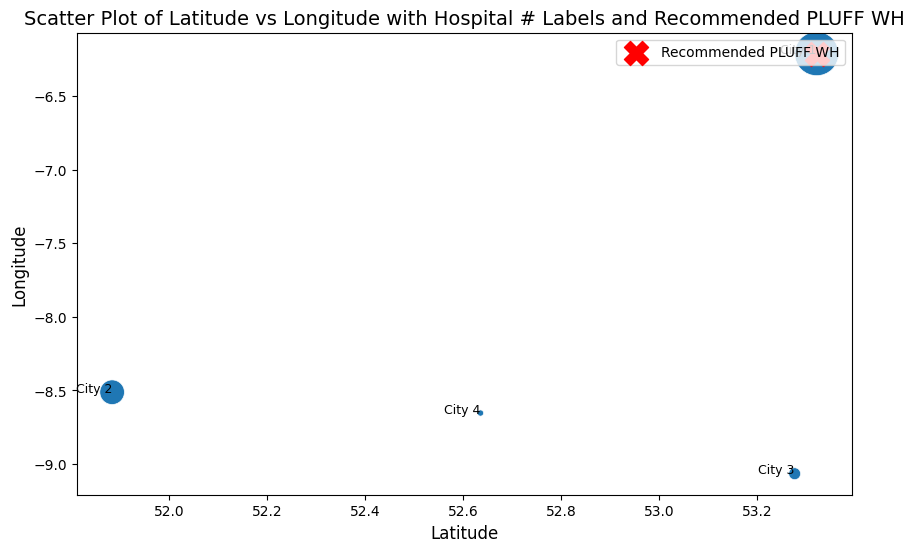

   Hospital #  Latitude  Longitude  Patients  Distance_to_Warehouse
0           1  53.32192   -6.21270      9407             180.378884
1           2  51.88300   -8.51239      3768              84.207455
2           3  53.27697   -9.06613      1791              76.505378
3           4  52.63533   -8.65385      1352               0.000000


In [79]:
# Initialize the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot using seaborn for cities
sns.scatterplot(x='Latitude', y='Longitude', size='Patients', data=df, sizes=(20, 1000), legend=False)

# Plot the capital location with a distinct marker and label it
plt.scatter(Capital_Latitude, Capital_Longitude, color='red', s=300, marker='X', label='Recommended PLUFF WH')

# Add labels to each point for City #
for i in range(df.shape[0]):
    plt.text(df['Latitude'][i], df['Longitude'][i], f"City {df['Hospital #'][i]}", fontsize=9, ha='right')

# Add labels and title
plt.title("Scatter Plot of Latitude vs Longitude with Hospital # Labels and Recommended PLUFF WH", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)

# Add legend, forcing the label to be displayed
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Print the DataFrame to see the updated Distance_to_Capital column
print(df)

In [80]:
# Export the DataFrame to a CSV file
output_file = 'city_data_with_distances.csv'
df.to_csv(output_file, index=False)

print(f"DataFrame exported to {output_file}")

DataFrame exported to city_data_with_distances.csv
